In [1]:
% matplotlib inline
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def checklon(data):
    cxx = (data['lon']).values # longitude

    # convert all longitude to longitude east
    cxx[cxx<0]= 360+cxx[cxx<0];
    data['lon_e'] = cxx
    cxbew = cxx
    cxbew[cxbew>180] = cxbew[cxbew>180]-360   
    data['lon'] = cxbew
    return data

def tempbin(data, var):
    
    if var[0] == 'MED4':
        y = data['TEMP'].values
    elif var[0] == 'syne1':
        y = data['temp'].values
    
    binned = pd.DataFrame()
    bins = np.arange(5, 35,1)
    bin_count = np.zeros(len(bins)-1)
    binned['temp'] = bins[0:len(bins)-1]+1/2
    
    for v in var:
        z = data[v].values 

        digitized = np.digitize(y, bins)
        bin_count = [np.shape(z[digitized == i])[0] for i in range(1, len(bins))]

        bin_means = [z[digitized == i].mean() for i in range(1, len(bins))]
        bin_sderr = [z[digitized == i].std() for i in range(1, len(bins))]/np.sqrt(bin_count) # standard error
    
        # append to the scales dataframe
        v1 = '%s_mean' % v
        v2 = '%s_sderr' % v
        
        binned[v1] = bin_means
        binned[v2] = bin_sderr
    binned.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
    return binned 

In [3]:
# import the data
# pro ecotypes
filePath = r'/Users/sclayton/Google Drive/work/physics_traits/data/Monster dataset AMT 13_proportal.xlsx'
pro_table = pd.read_excel(filePath)

# syn ecotypes
filePath = r'/Users/sclayton/Google Drive/work/physics_traits/data/Syne data for Sophie.xlsx'
syn_table = pd.read_excel(filePath)

syn_table.rename(columns={'syne1 (cells/ml)': 'syne1'}, inplace=True)

print pro_table.columns
print syn_table.columns

Index([u'CTD', u'lat', u'lon', u'JD (GMT)', u'CTD deploy (GMT)', u'Niskin #',
       u'depth (m)', u'Pro FCM', u'T QPCR', u'MED4', u'MIT9312', u'MIT9211',
       u'NATL2A', u'SS120', u'MIT9313', u'Syn FCM', u'TEMP', u'light'],
      dtype='object')
Index([u'sample/cruise',       u'station',   u'lat (deg N)',           u'lon',
               u'depth',          u'temp',         u'syne1',         u'syne2',
               u'syne3',         u'syne4',         u'syne8',        u'syne10',
              u'syne15',        u'syne16',          u'CRD1',          u'CRD2'],
      dtype='object')


In [4]:
pro_ecotypes = ['MED4', 'MIT9312', 'MIT9211', 'NATL2A', 'SS120', 'MIT9313']
syn_ecotypes = ['syne1', 'syne2', 'syne3', 'syne8', 'syne10', 'syne15', 'syne16', 'CRD1', 'CRD2']

# make a histogram for each ecotype against temperature
temp_bins_pro = tempbin(pro_table, pro_ecotypes)
temp_bins_syn = tempbin(syn_table, syn_ecotypes)



/Users/sclayton/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/sclayton/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


In [11]:
print np.max(pro_table['lon']), np.min(pro_table['lon'])

 -11.539 -51.42


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


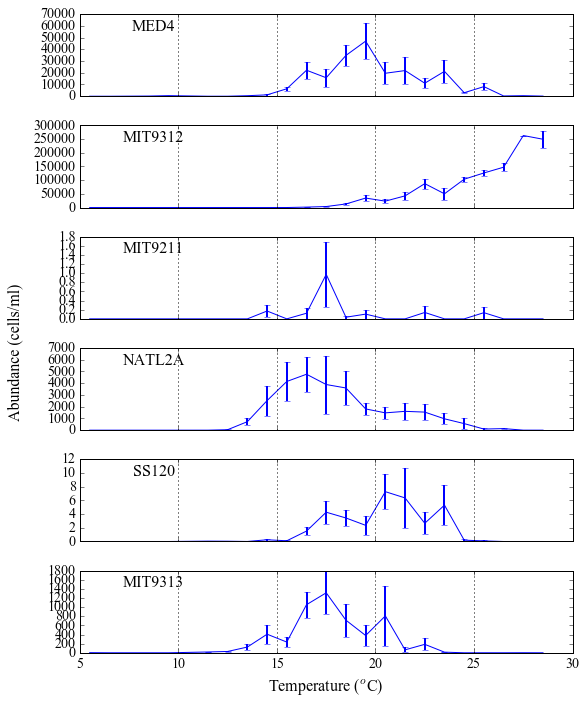

In [5]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})
rcParams.update({'font.size': 14})

fig1, axarr = plt.subplots(6, 1, sharex='col', figsize = (8, 10), dpi = 600)

i = 0
for n in pro_ecotypes:
    
    v1 = '%s_mean' % n
    v2 = '%s_sderr' % n
    
    axarr[i].errorbar(temp_bins_pro['temp'],temp_bins_pro[v1], yerr=temp_bins_pro[v2], elinewidth=2, markersize=12, label = n)
    axarr[i].text(.15,.8, n, horizontalalignment='center', transform=axarr[i].transAxes, fontsize = 16)
    axarr[i].xaxis.grid(True,'minor', linewidth=0.5)
    axarr[i].xaxis.grid(True,'major',linewidth=1)

    i += 1

plt.xlabel('Temperature ($^o$C)',fontsize=16)
fig1.text(-0.02, 0.5, 'Abundance (cells/ml)', va='center', rotation='vertical', fontsize = 16)
    
plt.show()
fig1.savefig('/Users/sclayton/Google Drive/work/physics_traits/pro_vs_temp.png', bbox_inches='tight', dpi = 600)

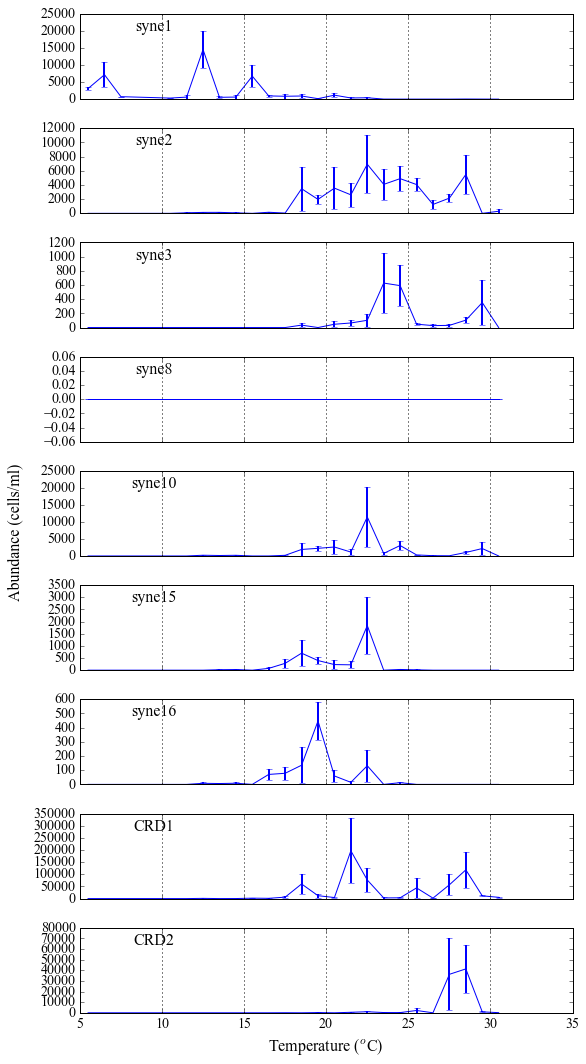

In [6]:
fig2, axarr = plt.subplots(9, 1, sharex='col', figsize = (8, 15), dpi = 600)

i = 0
for n in syn_ecotypes:
    
    v1 = '%s_mean' % n
    v2 = '%s_sderr' % n
    
    axarr[i].errorbar(temp_bins_syn['temp'],temp_bins_syn[v1], yerr=temp_bins_syn[v2], elinewidth=2, markersize=12, label = n)
    axarr[i].text(.15,.8, n, horizontalalignment='center', transform=axarr[i].transAxes, fontsize = 16)
    axarr[i].xaxis.grid(True,'minor', linewidth=0.5)
    axarr[i].xaxis.grid(True,'major',linewidth=1)
    i += 1

plt.xlabel('Temperature ($^o$C)',fontsize=16)
fig2.text(-0.02, 0.5, 'Abundance (cells/ml)', va='center', rotation='vertical', fontsize = 16)

    
plt.show()
fig2.savefig('/Users/sclayton/Google Drive/work/physics_traits/syn_vs_temp.png', bbox_inches='tight', dpi = 600)